<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Andrii/FINAL_project_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [ ]:
!gdown --id "186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4"

Downloading...
From: https://drive.google.com/uc?id=186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4
To: /content/archive.zip
2.39MB [00:00, 75.1MB/s]


In [ ]:
!unzip -q "archive.zip" -d data/

replace data/april-2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: An


In [ ]:
all_file_names = glob.glob("data/*2017.csv")
all_file_names = sorted(all_file_names)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 data/april-2017.csv
1 data/august-2017.csv
2 data/december-2017.csv
3 data/february-2017.csv
4 data/january-2017.csv
5 data/july-2017.csv
6 data/june-2017.csv
7 data/march-2017.csv
8 data/may-2017.csv
9 data/november-2017.csv
10 data/october-2017.csv
11 data/september-2017.csv


In [ ]:
jan = pd.read_csv(all_file_names[4], parse_dates=['UTC time'])
feb = pd.read_csv(all_file_names[3], parse_dates=['UTC time'])
mar = pd.read_csv(all_file_names[7], parse_dates=['UTC time'])
apr = pd.read_csv(all_file_names[0], parse_dates=['UTC time'])
may = pd.read_csv(all_file_names[8], parse_dates=['UTC time'])
jun = pd.read_csv(all_file_names[6], parse_dates=['UTC time'])
jul = pd.read_csv(all_file_names[5], parse_dates=['UTC time']) 
aug = pd.read_csv(all_file_names[1], parse_dates=['UTC time']) 
sep = pd.read_csv(all_file_names[11], parse_dates=['UTC time']) 
octo = pd.read_csv(all_file_names[10], parse_dates=['UTC time']) 
nov = pd.read_csv(all_file_names[9], parse_dates=['UTC time']) 
dec = pd.read_csv(all_file_names[2], parse_dates=['UTC time'])

In [ ]:
list_of_month = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
for tex in list_of_month:

  tex["Week"] = tex["UTC time"].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:


all_week_df = []
for ttt in list_of_month:
  list_of_week = ttt['Week'].tolist()
  list_of_week = list(dict.fromkeys(list_of_week))

  for wk in list_of_week:
    globals()['week%s' % wk] = ttt[ttt['Week'] == wk]
    all_week_df.append(globals()['week%s' % wk])

In [ ]:
sensors = pd.read_csv("data/sensor_locations.csv")

In [ ]:
sensors.head()

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066
3,147,50.048924,19.962262
4,169,50.048699,20.101569


In [ ]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('haversine')

arydist = dist.pairwise(sensors[['latitude','longitude']].to_numpy())*6371000/1000  #3798
datadist = pd.DataFrame(arydist,  columns=sensors.id, index=sensors.id).replace(0, np.nan)


datadist

id,3,140,142,147,169,170,171,172,173,174,176,177,178,179,180,181,182,183,184,185,187,189,192,194,195,196,201,202,203,204,205,208,209,210,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,263,622,713,808,857,895
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,NaN,0.008914,548.572036,56.488484,874.997005,429.780166,173.770805,476.090626,397.896071,289.889868,248.758840,326.342296,408.295639,204.232164,289.329796,90.998812,449.696252,574.373878,267.574089,426.874232,384.043707,208.005527,587.519644,425.888931,230.728098,57.502586,35.359328,388.266989,620.622390,130.035749,375.348921,268.389493,519.304030,360.303471,102.295752,416.677776,349.295578,89.215850,319.625343,238.314572,841.971054,615.903537,159.077952,337.994553,581.432743,252.883307,765.388131,525.367454,221.974023,444.273557,371.506078,102.344821,407.764935,384.047873,222.315819,549.283619
140,0.008914,NaN,548.568055,56.482753,875.002705,429.776014,173.778551,476.085776,397.889774,289.883533,248.762415,326.342275,408.287417,204.231224,289.327217,90.991521,449.698140,574.371109,267.566495,426.871142,384.043078,208.000244,587.513874,425.896435,230.735694,57.509418,35.350710,388.258320,620.630041,130.030966,375.346923,268.394683,519.302998,360.310202,102.286988,416.671250,349.290536,89.222631,319.634221,238.306371,841.964046,615.912138,159.080553,338.003181,581.425381,252.874515,765.380186,525.358541,221.975423,444.264684,371.500211,102.336057,407.756694,384.047244,222.317223,549.279650
142,548.572036,548.568055,NaN,573.398662,1414.554674,119.248160,566.226263,92.373507,212.210598,289.475557,797.113462,294.366934,357.910537,364.292345,784.460932,470.481852,990.563566,86.347952,351.035416,132.582977,242.976022,345.436350,141.770026,939.968712,754.301553,538.114067,525.889420,595.731658,1122.237783,419.446369,203.702739,485.003772,186.340042,892.122829,529.537201,215.379837,208.236783,534.120034,728.607001,398.216174,417.573061,1062.845858,446.745050,811.550182,285.907018,532.346151,459.732244,570.384649,763.193170,489.178271,770.320823,529.528245,360.155682,242.978071,763.549991,1.046374
147,56.488484,56.482753,573.398662,NaN,866.741997,454.163547,227.591187,495.578119,406.760615,299.842442,229.345399,371.308592,395.197412,246.797174,238.446018,102.919649,417.496703,606.109065,265.237243,457.493274,426.447079,228.027889,599.571707,436.714536,245.490537,113.555816,52.340931,344.525952,632.062319,156.603071,411.844625,324.740349,559.576537,363.778987,68.803073,423.329277,368.462612,145.227913,361.861927,228.327335,842.038615,641.643659,212.210597,365.861701,578.546510,213.113516,754.622973,490.382524,189.803997,414.900733,315.030917,68.847234,394.366376,426.451672,190.161071,574.176688
169,874.997005,875.002705,1414.554674,866.741997,NaN,1298.443924,861.594427,1348.908972,1271.768071,1163.870490,639.730963,1145.309956,1251.310908,1050.991374,755.050174,963.132142,519.368772,1424.574766,1131.727207,1285.311194,1207.677777,1082.704304,1462.498719,486.178952,660.575043,877.081347,904.037006,1103.095614,354.897052,1004.113149,1221.714258,977.665901,1340.155791,522.630836,929.243248,1289.376461,1223.218316,880.609136,741.224916,1092.402998,1707.400825,511.416111,971.378684,631.901487,1442.895273,1025.871664,1606.606007,1272.718511,693.464672,1230.788100,894.534136,929.274824,1250.080500,1207.679504,693.134319,1415.149504
170,429.780166,429.776014,119.248160,454.163547,1298.443924,NaN,458.134784,61.852530,127.568918,176.441456,678.131850,206.490112,283.866888,251.609480,667.456325,351.250804,871.399781,167.015994,241.735771,55.831810,172.987905,226.247206,192.292996,827.294275,639.106875,421.378852,406.696951,502.723375,1012.510805,300.369794,116.893388,391.488180,194.708912,776.586513,411.209734,142.396987,92.304576,419.263732,626.489924,287.534573,482.333945,961.569839,335.911594,703.114112,284.790761,424.728380,482.913411,504.990936,643.952491,415.117571,661.362862,411.202320,285.875509,172.992488,644.309253,120.018576
171,173.770805,173.778551,566.2

In [ ]:
nearest_sensor = list()
min_dist_tosensor = list()
second_level_ofnearest = list()
third_sensor = list()
for x in datadist:
  nearest_sensor.append(datadist[x].idxmin())
  min_dist_tosensor.append(datadist[x].min())

  second_value = datadist[x].sort_values().values[1]
  second_level_ofnearest.append(datadist[datadist[x] == second_value].index[0])

  third_value = datadist[x].sort_values().values[2]
  third_sensor.append(datadist[datadist[x] == third_value].index[0])

sensors['nearest_sensor'] = np.array(nearest_sensor)
sensors['second_level_ofnearest'] = np.array(second_level_ofnearest)
sensors['third_sensor'] = np.array(third_sensor)


sensors['min_dist_tosensor'] = np.around(np.array(min_dist_tosensor), decimals = 3)
sensors 

,id,latitude,longitude,nearest_sensor,second_level_ofnearest,min_dist_tosensor,third_sensor
0,3,50.057748,19.961375,140,201,0.009,147
1,140,50.057747,19.961374,3,201,0.009,147
2,142,50.084816,19.878066,895,183,1.046,172
3,147,50.048924,19.962262,201,140,52.341,3
4,169,50.048699,20.101569,203,194,354.897,219
5,170,50.077467,19.895577,185,172,55.832,213
6,171,50.084134,19.968416,214,196,87.745,220
7,172,50.073094,19.886750,170,142,61.853,895
8,173,50.057537,19.897547,212,213,24.038,174
9,174,50.057242,19.914874,184,213,67.460,189


In [ ]:
# FIRST Function
def get_mean_from_nearest_sensor(col_name, col_id, wenk):
  near_sensor = str(sensors[sensors.id == col_id]['nearest_sensor'].values[0])
  for x in wenk.columns:
    if near_sensor in x and col_name in x:
      return wenk[x].mean()
  
     
    

# get_mean_from_nearest_sensor(col_name = 'pressure', col_id = 178, month = jan)

In [ ]:
# SECOND Function

def get_mean_from_second_sensor(col_name, col_id, wenk):
  second_sensor = str(sensors[sensors.id == col_id]['second_level_ofnearest'].values[0])
  for x in wenk.columns:
    if second_sensor in x and col_name in x:
      if wenk[x].mean()isna().bool:

      return wenk[x].mean()
  
     
    

# get_mean_from_nearest_sensor(col_name = 'pressure', col_id = 178, month = jan)

In [ ]:
#THIRD FUNCTION

def get_mean_from_third_sensor(col_name, col_id, wenk):
  # list_of_month = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
  third_sensor = str(sensors[sensors.id == col_id]['third_sensor'].values[0])
  for x in wenk.columns:
    if third_sensor in x and col_name in x:       
      return wenk[x].mean()
  
     
    

# get_mean_from_nearest_sensor(col_name = 'pressure', col_id = 178, month = jan)

In [ ]:
# list_of_month = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
# list_of_month[list_of_month.index(jan) + 1]['140_humidity'].mean()
# jan['228_pressure'].mean()
# jan.resample('1W').mean()


In [ ]:
# WEEK LOOP first layer
pd.options.mode.chained_assignment = None  # "warn" is the default.

for weik in all_week_df:
  for colum in weik.columns[1:-1]:
    id_sensor = int(colum.split('_')[0])
    name_col = (colum.split('_')[1])
    if  weik[colum].isna().sum() >= 1 :

      func = get_mean_from_nearest_sensor(col_name = name_col, col_id = id_sensor, wenk =  weik)
      func_sec = get_mean_from_second_sensor(col_name = name_col, col_id = id_sensor, wenk =  weik)
      if func is  np.nan:
        print(func)
        weik[colum].fillna(func, inplace=True)
      else:
        print(func_sec)
        weik[colum].fillna(func_sec, inplace=True)

In [ ]:
# WEEK LOOP second layer

for weik in all_week_df:
  for colum in weik.columns[1:-1]:
    id_sensor = int(colum.split('_')[0])
    name_col = (colum.split('_')[1])
    if  weik[colum].isna().sum() >= 1 :

      func = get_mean_from_nearest_sensor(col_name = name_col, col_id = id_sensor, wenk =  weik)
      func_sec = get_mean_from_second_sensor(col_name = name_col, col_id = id_sensor, wenk =  weik)
      
      weik[colum].fillna(func_sec, inplace=True)

In [ ]:
# WEEK LOOP third layer

for weik in all_week_df:
  for colum in weik.columns[1:-1]:
    id_sensor = int(colum.split('_')[0])
    name_col = (colum.split('_')[1])
    if  weik[colum].isna().sum() >= 1 :

      # func = get_mean_from_nearest_sensor(col_name = name_col, col_id = id_sensor, wenk =  weik)
      # func_sec = get_mean_from_second_sensor(col_name = name_col, col_id = id_sensor, wenk =  weik)
      func_third = get_mean_from_third_sensor(col_name = name_col, col_id = id_sensor, wenk =  weik)
      weik[colum].fillna(func_third, inplace=True)

In [ ]:
# MONTH LOOP
# for mnth in list_of_month:
#   for colum in mnth.columns[1:-1]:
#     id_sensor = int(colum.split('_')[0])
#     name_col = (colum.split('_')[1])
#     if  mnth[colum].isna().sum() >= 1 :
      
#       func = get_mean_from_nearest_sensor(col_name = name_col, col_id = id_sensor, wenk =  mnth)
#       mnth[colum].fillna(func, inplace=True)

In [ ]:
for x in week1.columns[1:]:
  if  week1[x].isna().sum() > 15:
    print(f"!!! COLUMN {x} HAVE ALL NaN !!!")
  else:
    # jan[x].fillna(jan[x].mean(),inplace=True)
    print(f'column {x} have {jan[x].isna().sum()} NA')


column 3_temperature have 726 NA
column 3_humidity have 726 NA
!!! COLUMN 3_pressure HAVE ALL NaN !!!
column 3_pm1 have 409 NA
column 3_pm25 have 409 NA
column 3_pm10 have 409 NA
column 140_temperature have 744 NA
column 140_humidity have 744 NA
!!! COLUMN 140_pressure HAVE ALL NaN !!!
column 140_pm1 have 744 NA
column 140_pm25 have 744 NA
column 140_pm10 have 744 NA
column 142_temperature have 53 NA
column 142_humidity have 53 NA
column 142_pressure have 53 NA
column 142_pm1 have 78 NA
column 142_pm25 have 78 NA
column 142_pm10 have 78 NA
column 147_temperature have 1 NA
column 147_humidity have 1 NA
column 147_pressure have 1 NA
column 147_pm1 have 1 NA
column 147_pm25 have 1 NA
column 147_pm10 have 1 NA
column 169_temperature have 112 NA
column 169_humidity have 112 NA
column 169_pressure have 112 NA
column 169_pm1 have 112 NA
column 169_pm25 have 112 NA
column 169_pm10 have 112 NA
column 170_temperature have 0 NA
column 170_humidity have 0 NA
column 170_pressure have 0 NA
column 17

In [ ]:
week1

In [ ]:
# year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])
year = pd.concat(all_week_df)

In [ ]:
year = year.set_index("UTC time")

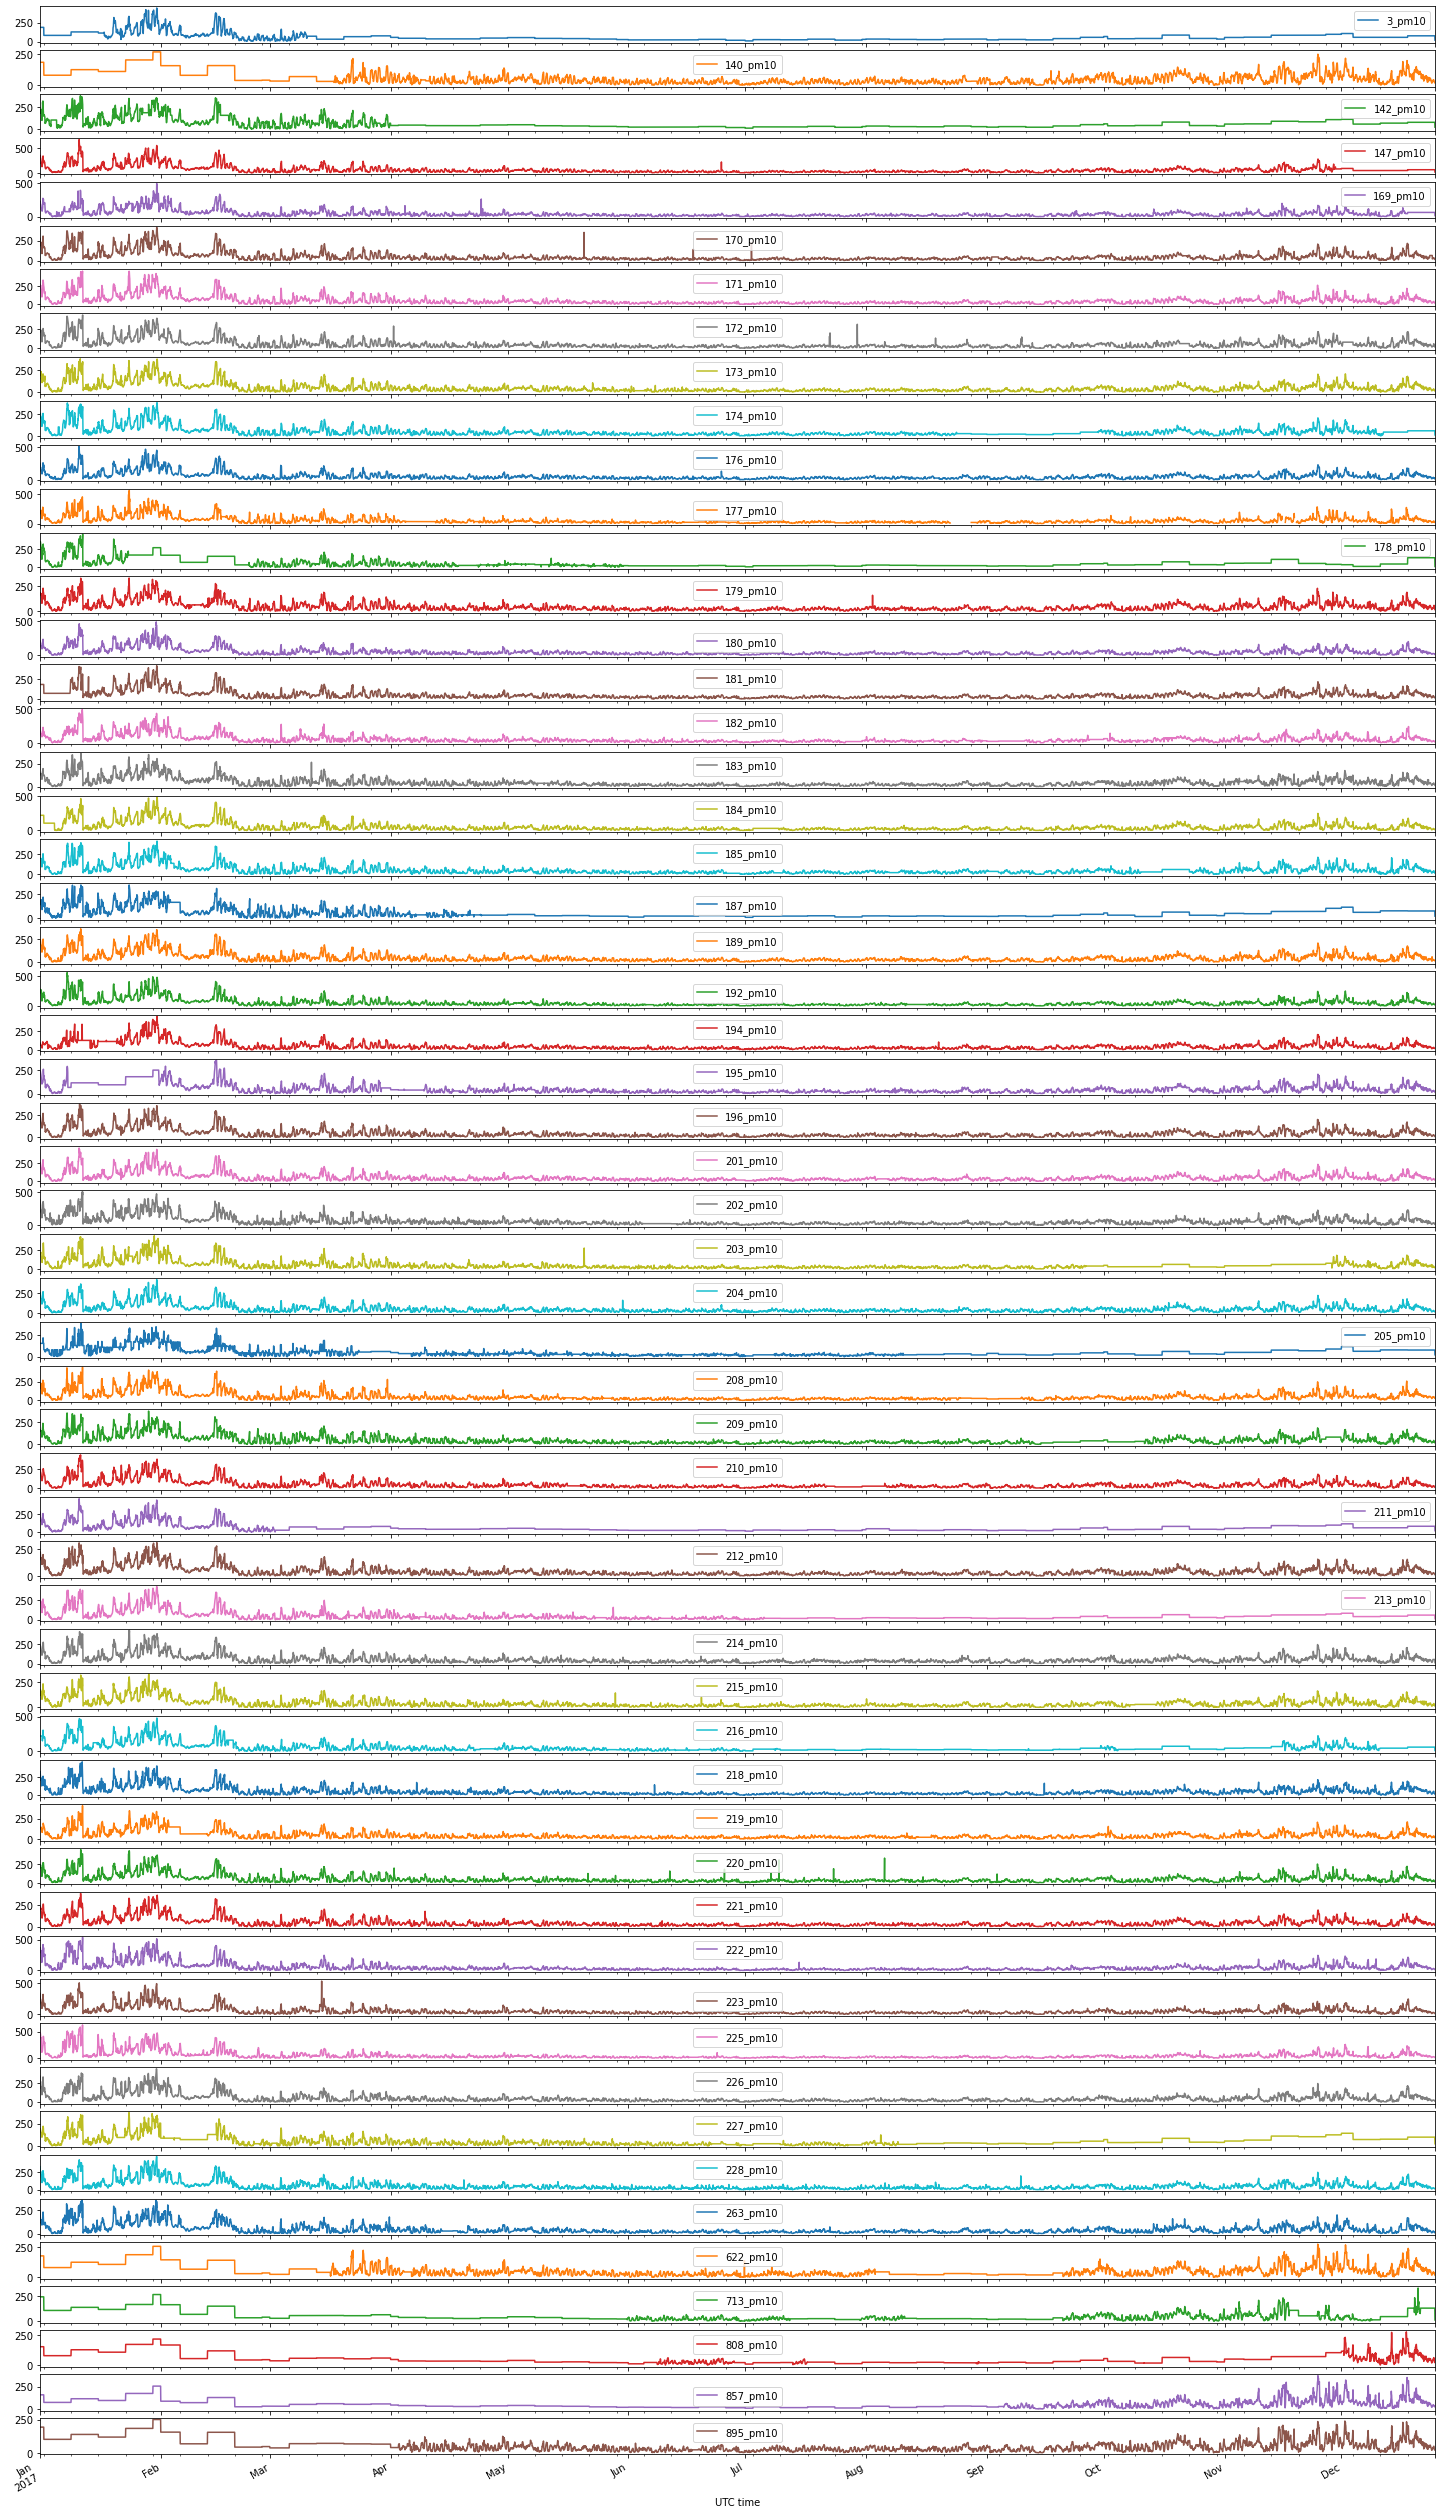

<Figure size 432x288 with 0 Axes>

In [ ]:
columns_pm10 = [ i  for i in year.columns[1:-1] if  i.split("_")[1] == "pm10"]

year[columns_pm10].plot(figsize=(25,50), legend=True, subplots=True)
plt.show()
plt.savefig('time-series-pm10.png')

In [ ]:
df2= year.groupby(year.columns.str.split('_').str[0], axis=1)

In [ ]:
for i in df2:
  old = i[1].columns
  new = i[1].columns.str.split("_").str[1]
  zmiana = { k:v  for k,v in zip(old,new)}
  i[1].rename(columns=zmiana,inplace=True)
  i[1]["id"] = i[0]
  new_df = new_df.append(i[1])
 

In [ ]:
new_df

,temperature,humidity,pressure,pm1,pm25,pm10,id
UTC time,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
...,...,...,...,...,...,...,...
2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895
2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895
2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895


**OTHER**

# OTHER

In [ ]:
X = new_df[['temperature', 'humidity', 'pressure']]
y = new_df['pm25']

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
model = SGDRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

NameError: ignored

In [ ]:
y_pred

array([72.11912395, 20.02362734, 67.04352415, ..., 10.21260744,
       25.31087723, 12.74044626])

In [ ]:
classification_report(y_test, y_pred)

NameError: ignored